# Import library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.style.use('dark_background')
import warnings
warnings.filterwarnings('ignore')
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
import seaborn as sns
%matplotlib inline

In [2]:
%%HTML
    <style type="text/css">
        table.dataframe td, table.dataframe th {
            border-style: solid;
        }
</style>

# Load data

In [3]:
cancer = load_breast_cancer()
df = pd.DataFrame(cancer['data'],columns=cancer['feature_names'])
print(f"shape of data: {df.shape}")
df.head()

shape of data: (569, 30)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# Check missing value

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [5]:
np.sum(pd.isnull(df).sum())

0

In [6]:
#Adding the target data to the DataFrame

In [7]:
df['Cancer'] = pd.DataFrame(cancer['target'])
print(f"shape of data: {df.shape}")
df.head()

shape of data: (569, 31)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Cancer
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


# Check the relative counts 

<AxesSubplot:xlabel='Cancer', ylabel='count'>

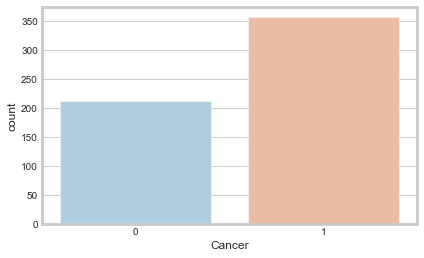

In [8]:
sns.set_style('whitegrid')
sns.countplot(x='Cancer',data=df,palette='RdBu_r')

# Exploratory Data Analysis

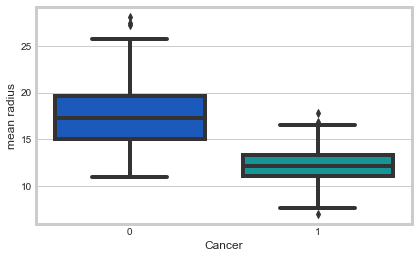

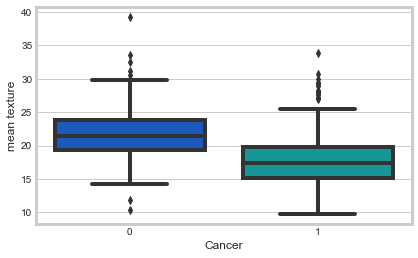

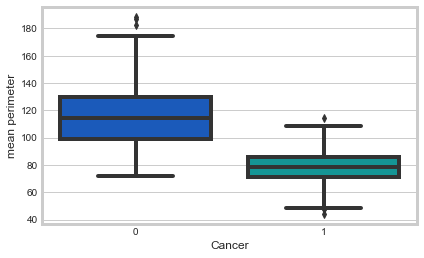

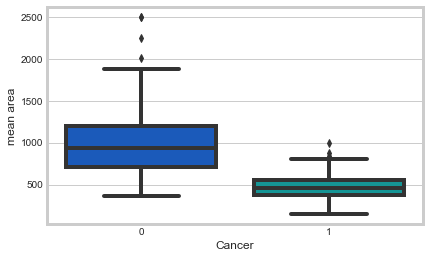

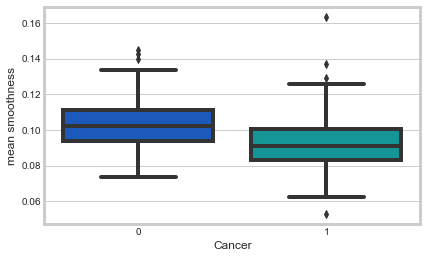

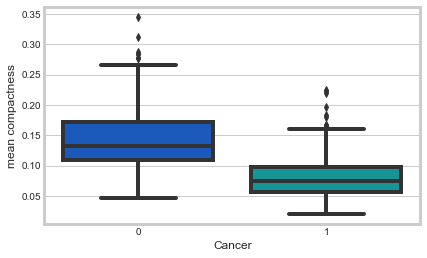

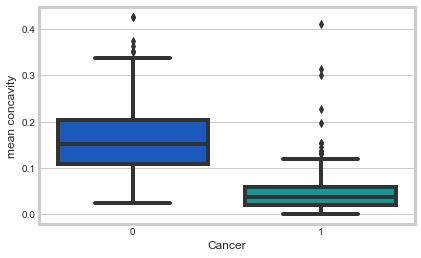

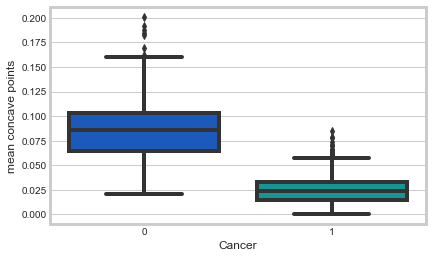

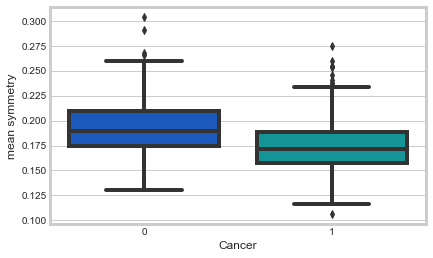

<Figure size 432x288 with 0 Axes>

In [9]:
l=list(df.columns[0:10])
for i in range(len(l)-1):
    sns.boxplot(x='Cancer',y=l[i], data=df, palette='winter')
    plt.figure()

# Train test data

In [10]:
df_feat = df.drop('Cancer',axis=1)
df_target = df['Cancer']
X_train, X_test, y_train, y_test = train_test_split(df_feat, df_target, test_size=0.30)

print(f"shape of X_train: {X_train.shape}")
print(f"shape of X_test: {X_test.shape}")
print(f"shape of y_train: {y_train.shape}")
print(f"shape of y_test: {y_test.shape}")

shape of X_train: (398, 30)
shape of X_test: (171, 30)
shape of y_train: (398,)
shape of y_test: (171,)


# Train the Support Vector Classifier

In [11]:
model = SVC()
model.fit(X_train,y_train)

SVC()

# Predictions and Evaluations

In [12]:
predictions = model.predict(X_test)
print(f"shape of predictions: {predictions.shape}")

shape of predictions: (171,)


In [13]:
print(confusion_matrix(y_test,predictions))
print('-------------------------------')
print(classification_report(y_test,predictions))

[[ 53  12]
 [  1 105]]
-------------------------------
              precision    recall  f1-score   support

           0       0.98      0.82      0.89        65
           1       0.90      0.99      0.94       106

    accuracy                           0.92       171
   macro avg       0.94      0.90      0.92       171
weighted avg       0.93      0.92      0.92       171



# Find best model Gridsearch

In [14]:
param_grid = {'C': [50,75,100,125,150], 'gamma': [1e-2,1e-3,1e-4,1e-5,1e-6], 'kernel': ['rbf']} 

In [15]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=1)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:    1.4s finished


GridSearchCV(estimator=SVC(),
             param_grid={'C': [50, 75, 100, 125, 150],
                         'gamma': [0.01, 0.001, 0.0001, 1e-05, 1e-06],
                         'kernel': ['rbf']},
             verbose=1)

# Best params

In [16]:
grid.best_params_

{'C': 100, 'gamma': 1e-05, 'kernel': 'rbf'}

In [17]:
grid.best_estimator_

SVC(C=100, gamma=1e-05)

# Predictions again

In [18]:
grid_predictions = grid.predict(X_test)

print(confusion_matrix(y_test,grid_predictions))
print('-------------------')
print(classification_report(y_test,grid_predictions))

[[ 61   4]
 [  3 103]]
-------------------
              precision    recall  f1-score   support

           0       0.95      0.94      0.95        65
           1       0.96      0.97      0.97       106

    accuracy                           0.96       171
   macro avg       0.96      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171

